In [359]:
import numpy as np
import pandas as pd

input_size = 2
layers =  [25,15]
output_size = 2

def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)
class Neural:
    def __init__(self):
        np.random.seed(0)
        model = {}
        model['W1'] = np.random.randn(input_size,layers[0]) 
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):

        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,W2) + b2 
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        #Store the outputs of each layer for back-propagation
        self.activation_outputs = (a1,a2,y_)
        
        return y_
        
    def backward(self,x,y,learning_rate=0.01):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3) #)h2+1,C) => (h2+1,m) X (m,C) 
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)  #(m,h2+1) => (m,h2+1) *(m,C X C,h2+1)
        dw2 = np.dot(a1.T,delta2)  
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T) 
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['W1'] -= learning_rate*dw1
        self.model['W2'] -= learning_rate*dw2
        self.model['W3'] -= learning_rate*dw3
        
        self.model['b1'] -= learning_rate*db1
        self.model['b2'] -= learning_rate*db2
        self.model['b3'] -= learning_rate*db3
        
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("Y_ ",y_.shape)
        
        

In [360]:
def one_hot(y,classes):
    m = y.shape[0]
    y_oht = np.zeros((m,classes))
    y_oht[np.arange(m),y] = 1
    return y_oht

def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l 


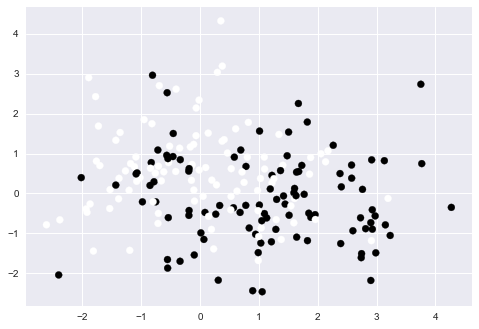

In [361]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

x,y = make_moons(n_samples=200,noise=1,random_state=2,shuffle=True)
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [362]:
model = Neural()
model.forward(x)

array([[9.68567804e-04, 9.99031432e-01],
       [2.02436654e-03, 9.97975633e-01],
       [2.99305228e-02, 9.70069477e-01],
       [4.58032314e-02, 9.54196769e-01],
       [5.84575947e-02, 9.41542405e-01],
       [9.70300442e-01, 2.96995583e-02],
       [2.92775152e-02, 9.70722485e-01],
       [3.29380756e-02, 9.67061924e-01],
       [3.04360368e-02, 9.69563963e-01],
       [5.50335944e-02, 9.44966406e-01],
       [7.98051565e-04, 9.99201948e-01],
       [9.67656302e-01, 3.23436979e-02],
       [1.21107562e-03, 9.98788924e-01],
       [1.91954562e-03, 9.98080454e-01],
       [4.37989935e-02, 9.56201006e-01],
       [1.47888467e-03, 9.98521115e-01],
       [6.77321194e-04, 9.99322679e-01],
       [9.45721025e-01, 5.42789748e-02],
       [8.45347251e-01, 1.54652749e-01],
       [1.83382691e-02, 9.81661731e-01],
       [5.86367583e-02, 9.41363242e-01],
       [1.62251352e-03, 9.98377486e-01],
       [1.20633809e-03, 9.98793662e-01],
       [6.95454806e-01, 3.04545194e-01],
       [3.025727

In [363]:
model.summary()

W1  (2, 25)
A1  (200, 25)
W2  (25, 15)
A2  (200, 15)
W3  (15, 2)
Y_  (200, 2)


In [364]:
def train(x,y,model,epochs = 1000,logs=True):
    Y = one_hot(y,2)
    training_loss = []
    for i in range(epochs):
        y_ = model.forward(x)
        l = loss(Y,y_)
        training_loss.append(l)
        model.backward(x,Y)
        
        if(logs):
            print("epochs %d loss %.4f"%(i,l))
    return training_loss


In [365]:
losses = train(x,y,model)

epochs 0 loss 0.9728
epochs 1 loss 0.8390
epochs 2 loss 1.6496
epochs 3 loss 0.9564
epochs 4 loss 2.4126
epochs 5 loss 0.5851
epochs 6 loss 1.1469
epochs 7 loss 1.6432
epochs 8 loss 0.9063
epochs 9 loss 0.6617
epochs 10 loss 0.8750
epochs 11 loss 1.2501
epochs 12 loss 0.3725
epochs 13 loss 0.5107
epochs 14 loss 0.8662
epochs 15 loss 0.3134
epochs 16 loss 0.4005
epochs 17 loss 1.0099
epochs 18 loss 0.3868
epochs 19 loss 0.6464
epochs 20 loss 1.1989
epochs 21 loss 0.4876
epochs 22 loss 0.6665
epochs 23 loss 1.3722
epochs 24 loss 0.6117
epochs 25 loss 0.7999
epochs 26 loss 1.3633
epochs 27 loss 0.4962
epochs 28 loss 0.3709
epochs 29 loss 0.6182
epochs 30 loss 0.2919
epochs 31 loss 0.3990
epochs 32 loss 0.7289
epochs 33 loss 0.8486
epochs 34 loss 0.4621
epochs 35 loss 0.7230
epochs 36 loss 1.2005
epochs 37 loss 0.4352
epochs 38 loss 0.3611
epochs 39 loss 0.6014
epochs 40 loss 0.3404
epochs 41 loss 0.4880
epochs 42 loss 0.6136
epochs 43 loss 0.5356
epochs 44 loss 0.3244
epochs 45 loss 0.407

epochs 543 loss 0.1709
epochs 544 loss 0.1983
epochs 545 loss 0.1710
epochs 546 loss 0.1924
epochs 547 loss 0.1704
epochs 548 loss 0.1979
epochs 549 loss 0.1705
epochs 550 loss 0.1918
epochs 551 loss 0.1701
epochs 552 loss 0.1975
epochs 553 loss 0.1702
epochs 554 loss 0.1912
epochs 555 loss 0.1697
epochs 556 loss 0.1971
epochs 557 loss 0.1698
epochs 558 loss 0.1906
epochs 559 loss 0.1693
epochs 560 loss 0.1966
epochs 561 loss 0.1694
epochs 562 loss 0.1900
epochs 563 loss 0.1689
epochs 564 loss 0.1962
epochs 565 loss 0.1691
epochs 566 loss 0.1896
epochs 567 loss 0.1686
epochs 568 loss 0.1958
epochs 569 loss 0.1688
epochs 570 loss 0.1891
epochs 571 loss 0.1683
epochs 572 loss 0.1954
epochs 573 loss 0.1684
epochs 574 loss 0.1886
epochs 575 loss 0.1679
epochs 576 loss 0.1949
epochs 577 loss 0.1681
epochs 578 loss 0.1881
epochs 579 loss 0.1676
epochs 580 loss 0.1946
epochs 581 loss 0.1679
epochs 582 loss 0.1877
epochs 583 loss 0.1673
epochs 584 loss 0.1942
epochs 585 loss 0.1676
epochs 586 

epochs 913 loss 0.2144
epochs 914 loss 0.2220
epochs 915 loss 0.1968
epochs 916 loss 0.2164
epochs 917 loss 0.1679
epochs 918 loss 0.2031
epochs 919 loss 0.1749
epochs 920 loss 0.2111
epochs 921 loss 0.1501
epochs 922 loss 0.1690
epochs 923 loss 0.1450
epochs 924 loss 0.1609
epochs 925 loss 0.1424
epochs 926 loss 0.1610
epochs 927 loss 0.1396
epochs 928 loss 0.1560
epochs 929 loss 0.1407
epochs 930 loss 0.1575
epochs 931 loss 0.1403
epochs 932 loss 0.1555
epochs 933 loss 0.1381
epochs 934 loss 0.1546
epochs 935 loss 0.1372
epochs 936 loss 0.1538
epochs 937 loss 0.1370
epochs 938 loss 0.1546
epochs 939 loss 0.1379
epochs 940 loss 0.1579
epochs 941 loss 0.1366
epochs 942 loss 0.1542
epochs 943 loss 0.1366
epochs 944 loss 0.1547
epochs 945 loss 0.1365
epochs 946 loss 0.1542
epochs 947 loss 0.1368
epochs 948 loss 0.1551
epochs 949 loss 0.1389
epochs 950 loss 0.1618
epochs 951 loss 0.1463
epochs 952 loss 0.1769
epochs 953 loss 0.1781
epochs 954 loss 0.2227
epochs 955 loss 0.1843
epochs 956 

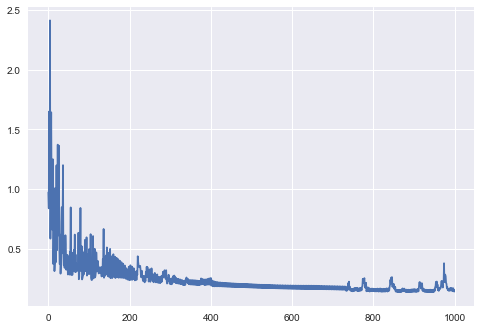

In [366]:
plt.plot(losses)

In [367]:
def accuracy(x,y):
    yo = model.predict(x)
    return np.sum(yo==y)/y.shape[0]
    
    

In [368]:
accuracy(x,y)

0.855

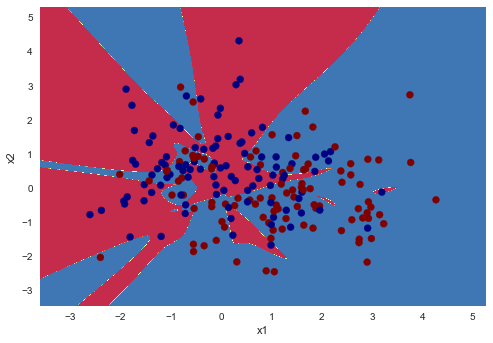

In [369]:

from visualize import plot_decision_boundary
plot_decision_boundary(lambda x:model.predict(x),x,y)